In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
bottle = pd.read_csv('bottle.csv')

In [3]:
bottle.shape

(5000, 2)

<AxesSubplot:xlabel='T_degC', ylabel='Salnty'>

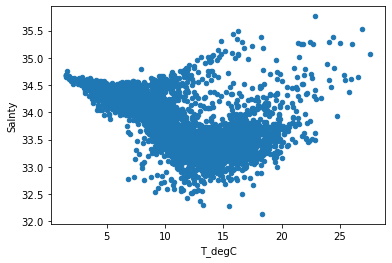

In [4]:
bottle.plot.scatter(x='T_degC', y='Salnty')

In [5]:
salnty = np.array(bottle['Salnty'])
temp = np.array(bottle['T_degC'])

### Question (a) 
#### Estimate conditional mean of sanlinity given temperature, and plot the conditional mean together with the scatter plot.


*Note:* Both salinity and temperature can be modeled with continous random variables. To simplify the conditional expectation, we discretize tempertures by bins with equal width. We then aggregate the salinity data within each bin. 

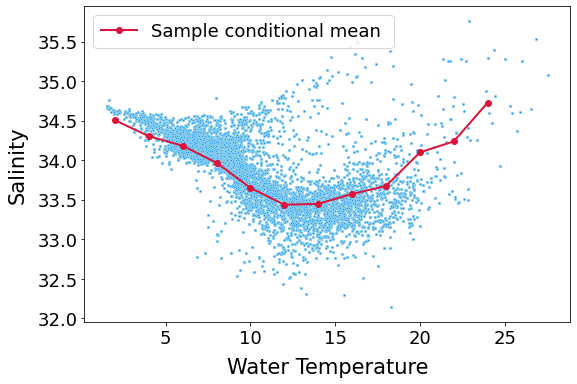

In [6]:
max_val = np.max(temp)
width_bin = 2
fig = plt.figure(figsize = (9,6)) 
plt.scatter(temp,salnty, s=5, c="dodgerblue", marker='o', edgecolor="skyblue")

# TODO: create bins from 0 to the maximum to discretize continous temperatures
grid = np.arange(0, max_val, width_bin)

# TODO: Compute the conditional expection of sanlinity given temperture
cond_average_salnty = np.zeros(len(grid))

for i in range(len(grid)):
    min_temp = width_bin*i
    max_temp = width_bin*(i+1)
    data = salnty[np.where((temp > min_temp) & (temp <= max_temp))]
    mean = np.mean(data)
    cond_average_salnty[i] += mean

plt.plot(grid[1:-1],cond_average_salnty[1:-1],'-o',lw=2,color='crimson', label="Sample conditional mean ")
plt.ylabel("Salinity", fontsize=21,labelpad=10)
plt.xlabel("Water Temperature", fontsize=21,labelpad=10)

plt.legend(fontsize=18)
# plt.xlim(-5,30)
# plt.ylim(-12,23)
plt.xticks(fontsize=18) 
plt.yticks(fontsize=18)
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(left=0.15)
plt.savefig('conditional_expectation.pdf')

### Question (b)

#### Estimate conditional standard deviation, and plot the confidence interval within +/- one conditional standard deviation.

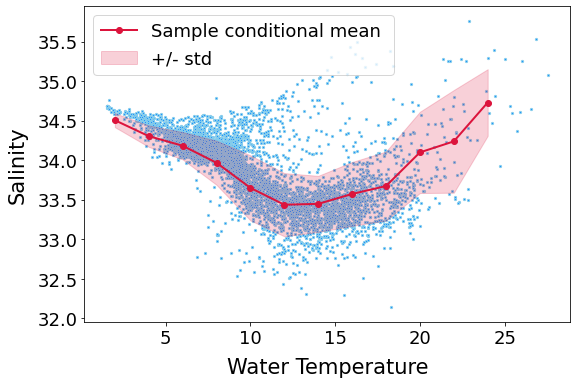

In [7]:
# TODO: Compute the conditional standard deviation of sanlinity given temperture
cond_std_salnty = np.zeros(len(grid))

for i in range(len(grid)):
    min_temp = width_bin*i
    max_temp = width_bin*(i+1)
    data = salnty[np.where((temp > min_temp) & (temp <= max_temp))]
    std = np.std(data)
    cond_std_salnty[i] += std
    
fig = plt.figure(figsize = (9,6)) 
plt.scatter(temp,salnty, s=5, c="dodgerblue", marker='o', edgecolor="skyblue")


plt.plot(grid[1:-1],cond_average_salnty[1:-1],'-o',lw=2,color='crimson', label="Sample conditional mean ")
plt.fill_between(grid[1:-1], cond_average_salnty[1:-1]-cond_std_salnty[1:-1], 
                cond_average_salnty[1:-1]+cond_std_salnty[1:-1], color='crimson', alpha=0.2, label="+/- std")

plt.ylabel("Salinity", fontsize=21,labelpad=10)
plt.xlabel("Water Temperature", fontsize=21,labelpad=10)

plt.legend(fontsize=18)
plt.xticks(fontsize=18) 
plt.yticks(fontsize=18)
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(left=0.15)
plt.savefig('conditional_expectation_w_std.pdf')